# Анализ бизнес-показателей

Описание проекта:

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

**Цель исследования** — проверить гипотезы и сформировать рекомендации для отдела маркетинга:
1. Расходы на рекламу превышают доходы от продаж;
2. Причина убытков - неудачная рекламная кампания, реклама без выбора целевой аудитории;
3. Анализ безнес метрик в разрезе различных признаков, такие как регион проживания пользователей, рекламный источник, тип устройства помогут выявить проблему и решить главную задачу - повысить рентабельность продаж и помочь компании выйти в плюс.



### Описание данных

Имеется три датасета:
* visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, 
* orders_info_short.csv — информацию о покупках, 
* costs_info_short.csv — информацию о расходах на рекламу.

### Шаг 1. 
### Изучение данных из файлов и их предобработка.

In [1]:
# Импортируем необходимые для работы библиотеки

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import warnings

from io import BytesIO
import requests

In [2]:
warnings.filterwarnings("ignore")

In [3]:
# Прочитаем файлы с данными

try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')

except FileNotFoundError:
    
    spreadsheet_id = '1wQhuaSCKcXu6QUZtbf4Oe3TErB_dSeLN'
    file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=xlsx'.format(spreadsheet_id)
    r = requests.get(file_name)
    visits = pd.read_excel(BytesIO(r.content))
    
    spreadsheet_id = '1XFxw16NfOO2axcuuzALXyPtOdx3qInH0'
    file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=xlsx'.format(spreadsheet_id)
    r = requests.get(file_name)
    orders = pd.read_excel(BytesIO(r.content))

    spreadsheet_id = '17J_ejSTwQNpoTjyVMx2r0kYmTsefNMLW'
    file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=xlsx'.format(spreadsheet_id)
    r = requests.get(file_name)
    costs = pd.read_excel(BytesIO(r.content))
    
    

In [4]:
# просмотрим состав данных
display(visits.head())
display(orders.head())
costs.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [5]:
# просмотрим структуру данных, изучим типы
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User Id        309901 non-null  int64         
 1   Region         309901 non-null  object        
 2   Device         309901 non-null  object        
 3   Channel        309901 non-null  object        
 4   Session Start  309901 non-null  datetime64[ns]
 5   Session End    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   User Id   40212 non-null  int64         
 1   Event Dt  40212 non-null  datetime64[ns]
 2   Revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

In [6]:
# Наименование столбцов приведем в соответсятвие с хорошим стилем

for i in (visits, orders, costs):
    i.columns = i.columns.str.replace(' ', '_')
    i.columns = i.columns.str.lower()

display(visits.head())
display(orders.head())
costs.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Присвоим столбцам содержащим информацию о дате и времени соответствующий тип.

In [7]:
# Преобразование данных о времени

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

Изучим содержимое столбцов - проверим на дубликаты, посмотрим есть ли пропуски.

In [8]:
def unique(row):
    return print(row.sort_values().unique())

In [9]:
# Просмотрим уникальные значения столбцов таблицы `visits`
(
    visits
    .drop(['user_id','session_start','session_end'], axis=1)
    .apply(unique)
) # исключим значения столбцов с количественными переменными

['France' 'Germany' 'UK' 'United States']
['Android' 'Mac' 'PC' 'iPhone']
['AdNonSense' 'FaceBoom' 'LeapBob' 'MediaTornado' 'OppleCreativeMedia'
 'RocketSuperAds' 'TipTop' 'WahooNetBanner' 'YRabbit' 'lambdaMediaAds'
 'organic']


region     None
device     None
channel    None
dtype: object

In [10]:
# Просмотрим уникальные значения столбцов  таблицы `costs`
(
    costs
    .drop(['dt','costs'], axis=1)
    .apply(unique)
) # исключим значения столбцов с количественными переменными

['AdNonSense' 'FaceBoom' 'LeapBob' 'MediaTornado' 'OppleCreativeMedia'
 'RocketSuperAds' 'TipTop' 'WahooNetBanner' 'YRabbit' 'lambdaMediaAds']


channel    None
dtype: object

In [11]:
# Приведем к единому регистру значения столбцов с названиями источников, чтобы исключить расхождения
for j in (visits, costs):
    j['channel'] = j['channel'].str.lower()

Изучим есть ли пропуски в значениях столбцов. Проверим наличие явных дубликатов.

In [12]:
for i in (visits, orders, costs):
    
    print('Количество пропусков в таблице:')
    print(i.isna().sum())
    duplicated = i.duplicated().sum()
    print(f'Количество явных дубликатов в таблице - {duplicated}')
        

Количество пропусков в таблице:
user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64
Количество явных дубликатов в таблице - 0
Количество пропусков в таблице:
user_id     0
event_dt    0
revenue     0
dtype: int64
Количество явных дубликатов в таблице - 0
Количество пропусков в таблице:
dt         0
channel    0
costs      0
dtype: int64
Количество явных дубликатов в таблице - 0


Изучим числовые значения столбцов.

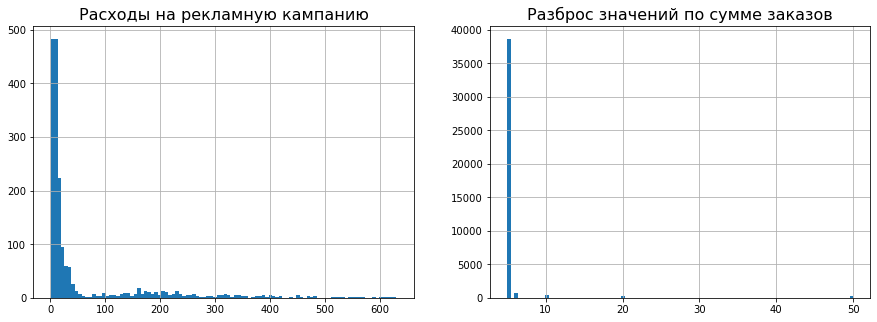

In [13]:
# задаём размер сетки для графиков
plt.figure(figsize=(15, 5))
# Изучим данные о стоимости заказов пользователей и расходов на рекламную кампанию
ax1 = plt.subplot(1, 2, 1)
costs['costs'].hist(bins=100, ax=ax1)
plt.title("Расходы на рекламную кампанию", fontsize=16)
ax2 = plt.subplot(1, 2, 2)
orders['revenue'].hist(bins=100, ax=ax2)
plt.title("Разброс значений по сумме заказов", fontsize=16)
plt.show()

In [14]:
orders['revenue'].value_counts()

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

Выводы:

* Данные не имеют пропусков и дубликатов; 
* Наименование столбцов приведены в соответствие с хорошим стилем; 
* Данные приведены к нужным типам; 
* Количественные показатели по сумме заказов не содержат аномальных значений; 
* Расходы на рекламу содержат достаточно большой разброс значений, некоторые рекламные кампании обходятся фирме очень дорого. Изучим оправданы ли затраты на рекламу.

### Шаг 2.
### Функции для расчета и анализа LTV, ROI, удержания и конверсии.


Добавим функцию для создания пользовательских профилей:

In [15]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Создадим функцию для расчета удержания.

In [16]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Создадим функцию для расчета конверсии.

In [17]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Создадим функцию для расчета окупаемости.

In [18]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [19]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

Создадим функцию для визуализации удержания.

In [20]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

Создадим функцию для визуализации конверсии.

In [21]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Создадим функцию для визуализации окупаемости.

In [22]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Мы добавили функции для создания профилей, расчёта удержания, конверсии, LTV и ROI и визуализации метрик в разрезе различных когорт пользователей, обобщенных различными признаками. 

Передадим в функции исходные данные, и изучим результаты, которые помогут нам найти причины убытков и составить рекомендации по их устранению.

### Шаг 3.

### Исследовательский анализ данных.

**3.1.** Создадим пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей.

In [23]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [24]:
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()
print(f'Минимальная дата привлечения пользователей - {min_analysis_date}')
print(f'Максимальная дата привлечения пользователей - {max_analysis_date}')

Минимальная дата привлечения пользователей - 2019-05-01
Максимальная дата привлечения пользователей - 2019-10-27


**3.2.** Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

**3.3.** Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

**3.4.** Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

Для того, чтобы изучить показатели всех этих когорт, создадим функцию, которая возвращает уникальные значения выбранных признаков, таблицу с показателями общей численности групп и долю в них платящих пользователей, а так же визуализируем результаты.

In [25]:
def get_payers(payers_region, payers_device, payers_channel):
    
    
    for i in (payers_region, payers_device, payers_channel):
        
        unique = profiles[i].unique()
        print(f'Уникальные значения признаков групп пользователей - {unique}')
        
        print()
        print(f'Доля платящих пользователей среди общего числа группы пользователей с разбивкой по {i}')
        
        profiles_by_i = (
            profiles
            .query('payer == True')
            .groupby([i])
            .agg({'user_id': 'count'})
            .reset_index()
            .rename(columns={'user_id': 'count_payers'})
            .sort_values(by='count_payers', ascending=False)
            )
        
        profiles_total_i = (
            profiles
            .groupby([i])
            .agg({'user_id': 'count'})
            .reset_index()
            .rename(columns={'user_id': 'count_users'})
            .sort_values(by='count_users', ascending=False)
        )
        
        profiles_total_i = profiles_total_i.merge(profiles_by_i)
        profiles_total_i['ratio_payers, %'] = round(profiles_total_i['count_payers']/profiles_total_i['count_users']*100, 2)
        profiles_total_i = profiles_total_i.sort_values(by='ratio_payers, %', ascending=False).reset_index(drop=True)
        
        display(profiles_total_i)
        
        plt.figure(
            figsize=(13, 5)
        )
        
        ax1 = plt.subplot(1, 2, 1)
        sns.barplot(x=i, y='count_payers', data=profiles_by_i, ax=ax1)
        
        plt.xticks(rotation=90)
        plt.title('Количество платящих пользователей по {}'.format(i))
        
        ax2 = plt.subplot(1, 2, 2)
        sns.barplot(x=i, y='ratio_payers, %', data=profiles_total_i)
        
        plt.xticks(rotation=90)
        plt.title("Доля платящих пользователей в % с разбивкой по {}".format(i))
        
        plt.show()
    

Уникальные значения признаков групп пользователей - ['United States' 'France' 'Germany' 'UK']

Доля платящих пользователей среди общего числа группы пользователей с разбивкой по region


,region,count_users,count_payers,"ratio_payers, %"
0,United States,100002,6902,6.90
1,Germany,14981,616,4.11
2,UK,17575,700,3.98
3,France,17450,663,3.80


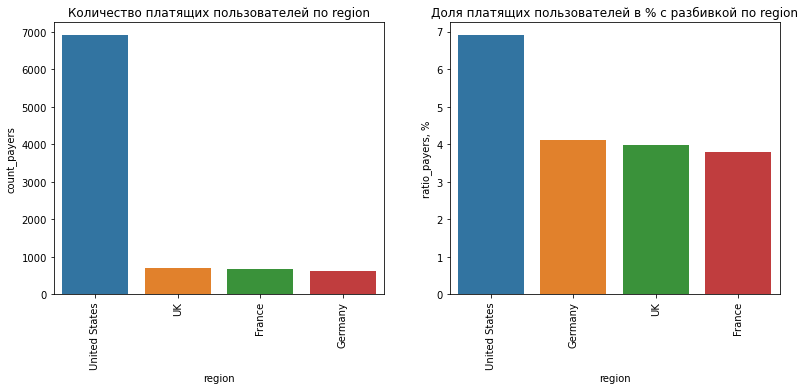

Уникальные значения признаков групп пользователей - ['Mac' 'iPhone' 'PC' 'Android']

Доля платящих пользователей среди общего числа группы пользователей с разбивкой по device


,device,count_users,count_payers,"ratio_payers, %"
0,Mac,30042,1912,6.36
1,iPhone,54479,3382,6.21
2,Android,35032,2050,5.85
3,PC,30455,1537,5.05


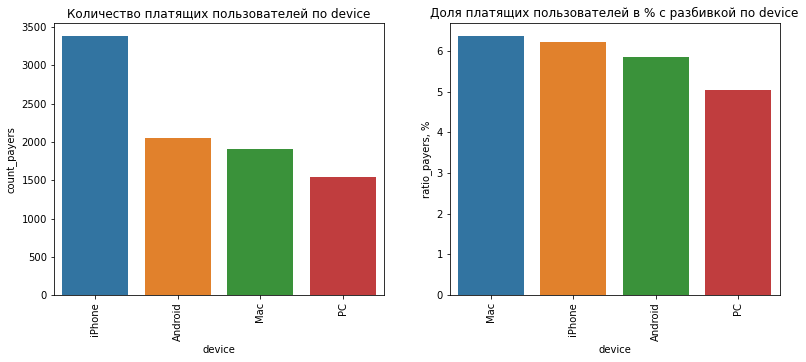

Уникальные значения признаков групп пользователей - ['faceboom' 'organic' 'adnonsense' 'yrabbit' 'mediatornado'
 'rocketsuperads' 'leapbob' 'tiptop' 'wahoonetbanner' 'opplecreativemedia'
 'lambdamediaads']

Доля платящих пользователей среди общего числа группы пользователей с разбивкой по channel


,channel,count_users,count_payers,"ratio_payers, %"
0,faceboom,29144,3557,12.20
1,adnonsense,3880,440,11.34
2,lambdamediaads,2149,225,10.47
3,tiptop,19561,1878,9.60
4,rocketsuperads,4448,352,7.91
5,wahoonetbanner,8553,453,5.30
6,yrabbit,4312,165,3.83
7,mediatornado,4364,156,3.57
8,leapbob,8553,262,3.06
9,opplecreativemedia,8605,233,2.71


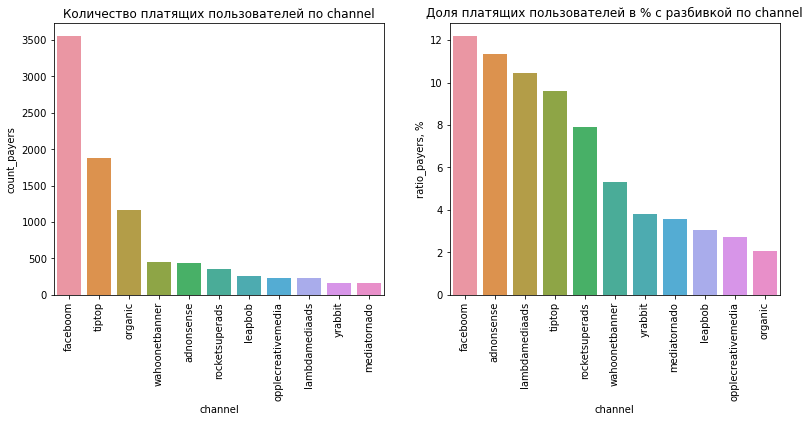

In [26]:
get_payers('region', 'device' , 'channel')

Исследовательский анализ данных показал:

* Пользователи привлекались напротяжении всего изучаемого периода с 01.05.2019 по 27.10.2019;
* Наибольшее число платящих пользователей - жители США, показатель в разы превышает число аналогичных пользователей из других стран. Доля плательщиков из США так же выше;
* Среди пользователей iPhone покупателей продукта больше, доля платящих пользователей из общего числа когорт различается несущественно и варьируется от 5 до 6,3 %.
* Пользователи, пришедшие из рекламных источников `faceboom`,`tiptop`,`organic` платят чаще других. Несмотря на то, что доля платящих органических клиентов по отношению к размеру своей когорты наименьшая.

Сопоставим доходы изучаемых когорт и расходы на рекламу. 

### Шаг 4.

### Маркетинг.

**4.1.** Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам. Визуализируем изменения метрик во времени.

In [27]:
costs_total = round(costs['costs'].sum(), 0).astype('int')
print(f'Общая сумма расходов за изучаемый период с 01.05.2019 по 27.10.2019 составила {costs_total} $')

Общая сумма расходов за изучаемый период с 01.05.2019 по 27.10.2019 составила 105497 $


In [28]:
costs

,dt,channel,costs
0,2019-05-01,faceboom,113.3
1,2019-05-02,faceboom,78.1
2,2019-05-03,faceboom,85.8
3,2019-05-04,faceboom,136.4
4,2019-05-05,faceboom,122.1
...,...,...,...
1795,2019-10-23,lambdamediaads,4.0
1796,2019-10-24,lambdamediaads,6.4
1797,2019-10-25,lambdamediaads,8.8
1798,2019-10-26,lambdamediaads,8.8


In [29]:
costs_by_channel = costs.groupby(['channel']).agg({'costs': 'sum'}).sort_values(by='costs', ascending=False).reset_index()
costs_by_channel

,channel,costs
0,tiptop,54751.30
1,faceboom,32445.60
2,wahoonetbanner,5151.00
3,adnonsense,3911.25
4,opplecreativemedia,2151.25
5,rocketsuperads,1833.00
6,leapbob,1797.60
7,lambdamediaads,1557.60
8,mediatornado,954.48
9,yrabbit,944.22


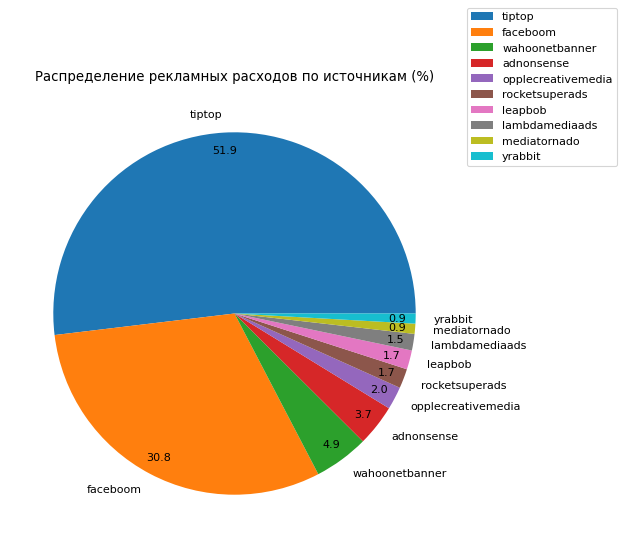

In [30]:

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (1000 / dpi, 600 / dpi) )


plt.title('Распределение рекламных расходов по источникам (%)')

plt.pie(costs_by_channel['costs'], labels=costs_by_channel['channel'], autopct='%.1f', pctdistance=0.9)
plt.legend(loc=6, bbox_to_anchor=(1.0, 1.0))
plt.show()

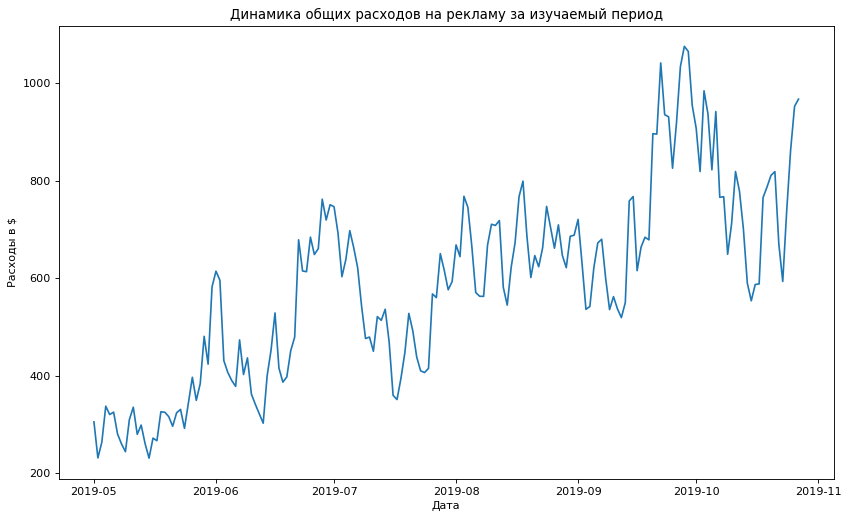

In [31]:

costs_dt = costs.groupby(['dt']).agg({'costs': 'sum'}).sort_values(by='dt').reset_index()
costs_dt['dt'] = pd.to_datetime(costs_dt['dt'])

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (1000 / dpi, 600 / dpi) )
plt.plot(costs_dt['dt'], costs_dt['costs'])
plt.title('Динамика общих расходов на рекламу за изучаемый период')
plt.xlabel('Дата')
plt.ylabel('Расходы в $')
plt.show()

channel,adnonsense,faceboom,lambdamediaads,leapbob,mediatornado,opplecreativemedia,rocketsuperads,tiptop,wahoonetbanner,yrabbit
dt,,,,,,,,,,
2019-05-01,40.95,113.3,17.6,2.52,6.24,4.25,21.060,80.0,10.8,8.1
2019-05-02,34.65,78.1,16.8,2.94,5.04,4.25,16.965,55.0,7.2,9.9
2019-05-03,47.25,85.8,16.8,2.73,6.96,5.75,16.380,64.0,8.4,9.0
2019-05-04,51.45,136.4,17.6,3.99,9.36,4.25,17.550,70.0,10.8,15.6
2019-05-05,36.75,122.1,12.8,4.62,11.04,5.50,27.495,78.0,12.0,9.6


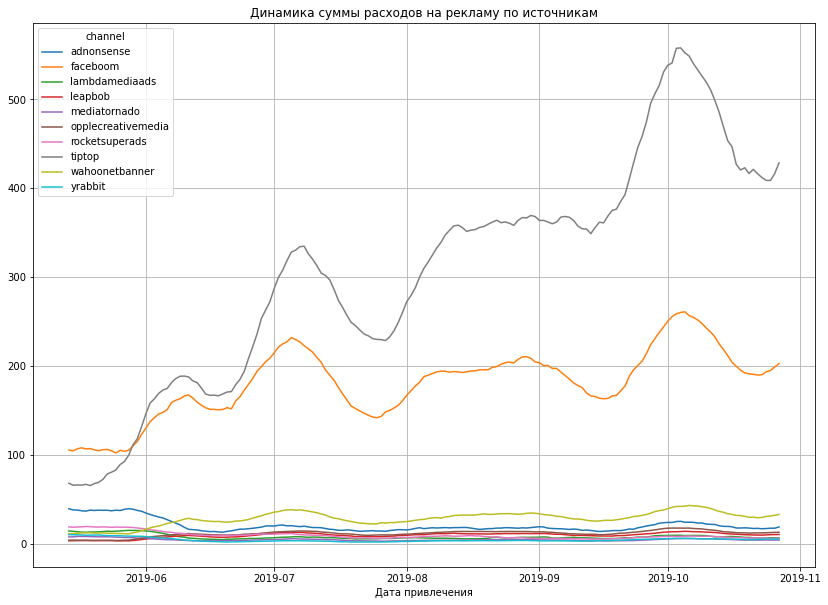

In [32]:
report = costs.pivot_table(index='dt', columns='channel', values='costs', aggfunc='sum')
display(report.head())


filtered_data = report.copy()
# для каждого источника считаем скользящее среднее
for column in report.columns.values:
    filtered_data[column] = filtered_data[column].rolling(14).mean()
    # строим график

filtered_data.plot(grid=True, figsize = (14,10))
plt.title('Динамика суммы расходов на рекламу по источникам')
plt.xlabel('Дата привлечения')
plt.show()

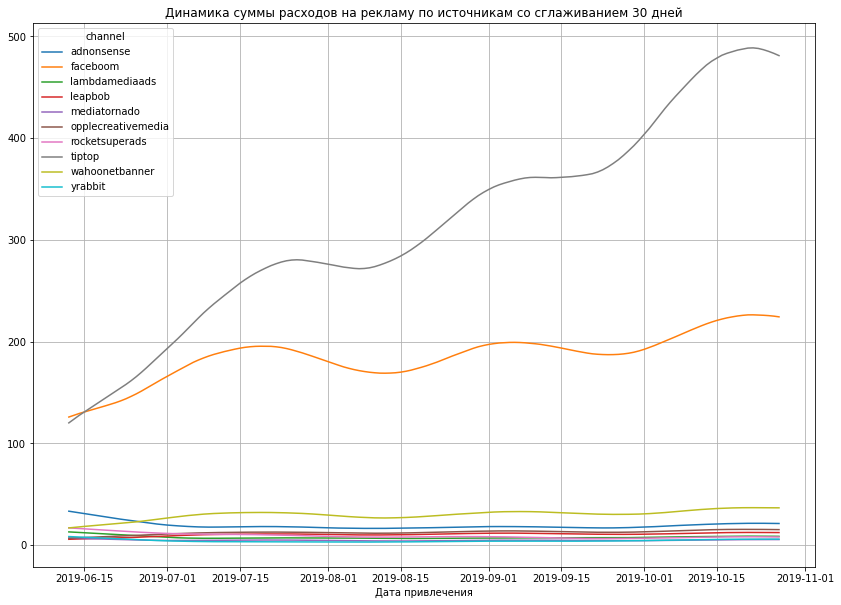

In [33]:
for column in report.columns.values:
    filtered_data[column] = filtered_data[column].rolling(30).mean()
    # строим график

filtered_data.plot(grid=True, figsize = (14,10))
plt.title('Динамика суммы расходов на рекламу по источникам со сглаживанием 30 дней')
plt.xlabel('Дата привлечения')
plt.show()

In [34]:
costs['dt'] = pd.to_datetime(costs['dt'])

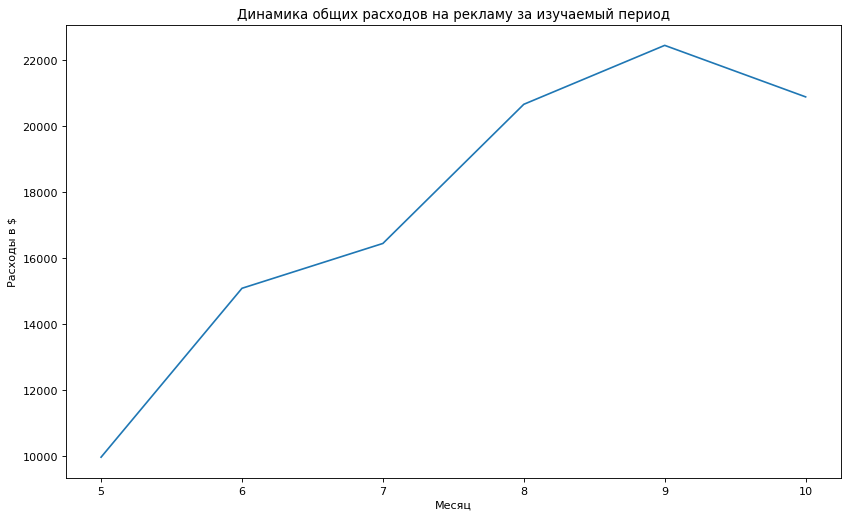

In [35]:
costs['month']  = costs['dt'].dt.month
costs_dt_month = costs.groupby(['month']).agg({'costs': 'sum'}).sort_values(by='month').reset_index()
dpi = 80
fig = plt.figure(dpi = dpi, figsize = (1000 / dpi, 600 / dpi) )
plt.plot(costs_dt_month['month'], costs_dt_month['costs'])
plt.title('Динамика общих расходов на рекламу за изучаемый период')
plt.xlabel('Месяц')
plt.ylabel('Расходы в $')
plt.show()

channel,adnonsense,faceboom,lambdamediaads,leapbob,mediatornado,opplecreativemedia,rocketsuperads,tiptop,wahoonetbanner,yrabbit
month,,,,,,,,,,
5,1169.70,3524.4,458.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70
6,538.65,5501.1,199.2,314.58,138.00,370.00,325.715,6675.6,921.0,106.20
7,504.00,5294.3,219.2,313.53,138.48,366.50,252.070,8410.2,851.4,97.38
8,579.60,6274.4,220.0,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74
9,581.70,6114.9,247.2,343.98,144.72,427.75,218.400,13232.5,977.4,152.79


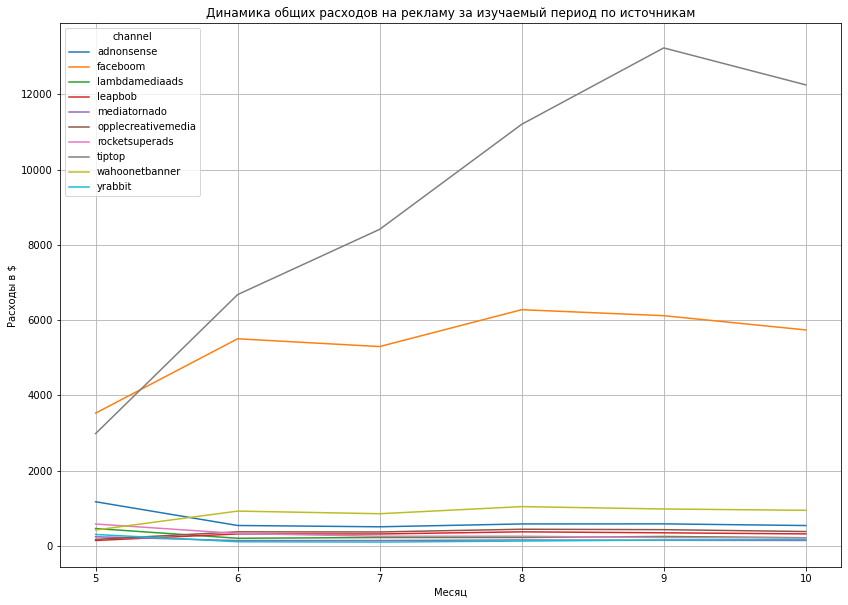

In [36]:
report_month = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
display(report_month.head())


report_month.plot(grid=True, figsize=(14, 10))
plt.title('Динамика общих расходов на рекламу за изучаемый период по источникам')
plt.xlabel('Месяц')
plt.ylabel('Расходы в $')
plt.show()

**4.2.** Узнаем, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика.

In [37]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [38]:
profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
tiptop,2.799003
faceboom,1.113286
adnonsense,1.008054
lambdamediaads,0.724802
wahoonetbanner,0.602245
rocketsuperads,0.412095
opplecreativemedia,0.250000
yrabbit,0.218975
mediatornado,0.218717


In [39]:
cac_mean = round(profiles['acquisition_cost'].mean(), 2)
print(f'Средняя стоимость привлечения одного клиента для всего проекта равна {cac_mean}')

Средняя стоимость привлечения одного клиента для всего проекта равна 0.7


In [40]:
acquisition_cost_by_channel = (
    profiles.groupby('channel')
    .agg({'acquisition_cost':'mean'})
    .sort_values(by='acquisition_cost', ascending=False)
    .reset_index()
)
acquisition_cost_by_channel

,channel,acquisition_cost
0,tiptop,2.799003
1,faceboom,1.113286
2,adnonsense,1.008054
3,lambdamediaads,0.724802
4,wahoonetbanner,0.602245
5,rocketsuperads,0.412095
6,opplecreativemedia,0.250000
7,yrabbit,0.218975
8,mediatornado,0.218717
9,leapbob,0.210172


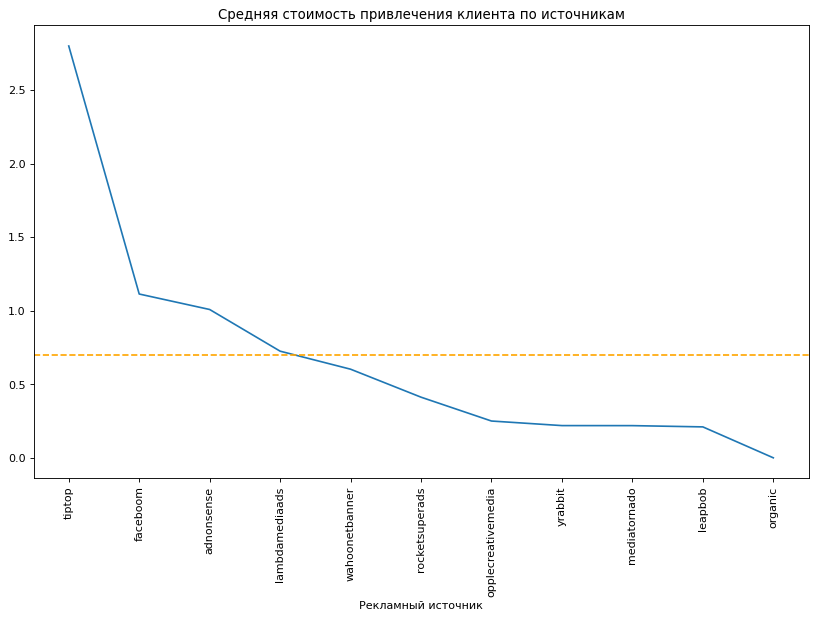

In [41]:
dpi = 80
fig = plt.figure(dpi = dpi, figsize = (1000 / dpi, 600 / dpi) )
plt.plot(acquisition_cost_by_channel['channel'], acquisition_cost_by_channel['acquisition_cost'])
plt.axhline(y=cac_mean, color='orange', linestyle='--', label='Средняя стоимость привлечения одного клиента для проекта')
plt.xticks(rotation=90)
plt.xlabel('Рекламный источник')
plt.title('Средняя стоимость привлечения клиента по источникам')
plt.show()


channel,adnonsense,faceboom,lambdamediaads,leapbob,mediatornado,opplecreativemedia,organic,rocketsuperads,tiptop,wahoonetbanner,yrabbit
month,,,,,,,,,,,
2019-05-01,1.027856,1.105868,0.753947,0.201842,0.226768,0.243544,0.0,0.549411,1.357468,0.577655,0.281144
2019-06-01,1.012500,1.116748,0.732353,0.211696,0.218354,0.249831,0.0,0.498798,2.077684,0.598441,0.182788
2019-07-01,0.992126,1.113652,0.721053,0.209859,0.215365,0.251544,0.0,0.417334,2.650552,0.607709,0.161493
2019-08-01,0.995876,1.112088,0.694006,0.210478,0.224325,0.250142,0.0,0.354000,3.011290,0.605941,0.191908
2019-09-01,1.004663,1.114434,0.714451,0.210385,0.210962,0.250586,0.0,0.302493,3.480405,0.601477,0.213992
2019-10-01,0.993715,1.114316,0.707285,0.212261,0.211722,0.250829,0.0,0.293056,3.543535,0.609314,0.234112


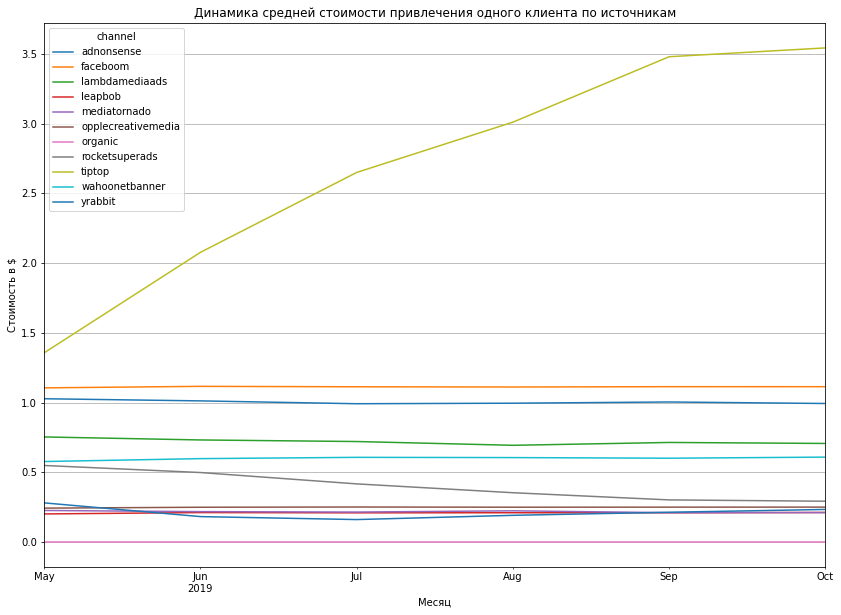

In [42]:
acquisition_cost_by_date = profiles.pivot_table(index='month', columns='channel', values='acquisition_cost', aggfunc='mean')
display(acquisition_cost_by_date)


acquisition_cost_by_date.plot(grid=True, figsize=(14, 10))
plt.title('Динамика средней стоимости привлечения одного клиента по источникам')
plt.xlabel('Месяц')
plt.ylabel('Стоимость в $')
plt.show()

Выводы раздела:

* Наибольшая стоимость рекламы из каналов привлечения клиентов `tiptop` и `faceboom`, доля расходов из этих источников к общей сумме расходов составляет 52 и 31 % соотвветственно;
* Динамика общих расходов на рекламу показывает рост от месяца к месяцу;
* Общая сумма расходов растет за счет увеличения вложений в рекламу из источников `tiptop` и `faceboom`, остальные источники имеют стабильную стоимость. Расходы на рекламу из `tiptop` с мая по октябрь выросли примерно в 5 раз, на рекламу из `faceboom` в 2 раза;
* Средняя стоимость привлечения одного клиента равна примерно 0,7.
* Сравнив среднюю стоимость привлечения для всего проекта с аналогичным показателем в разрезе каналов привлечения, можно увидеть что самые дорогие клиенты среди пришедших из `tiptop`, `faceboom` и `adnonsense`. Стоимость привлечния клиентов из `tiptop` превышает средний показатель в 4 раза, для `faceboom` в 1,5 раза;

Проверим как окупаются расходы по рекламным источникам, чтобы понять почему фирма имеет убытки. Пока можно предположить, что затраты на рекламу из этих истоников высоки несоразмерно доходам.

### Шаг 5.

### Окупаемость рекламы.

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. На календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

**5.1.** Проанализируем общую окупаемость рекламы. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI. Расчет показателей с разбивкой - с учетом органических пользователей и без них.

In [43]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

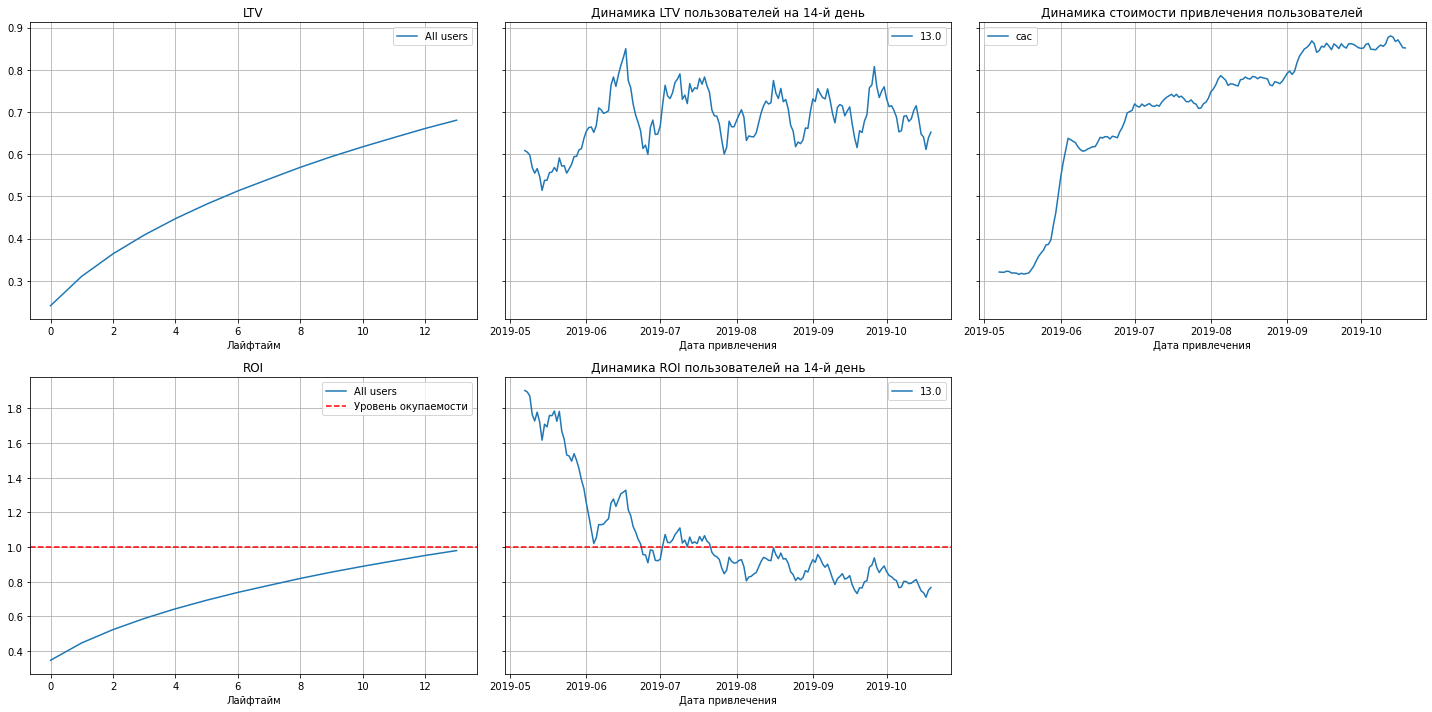

In [44]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

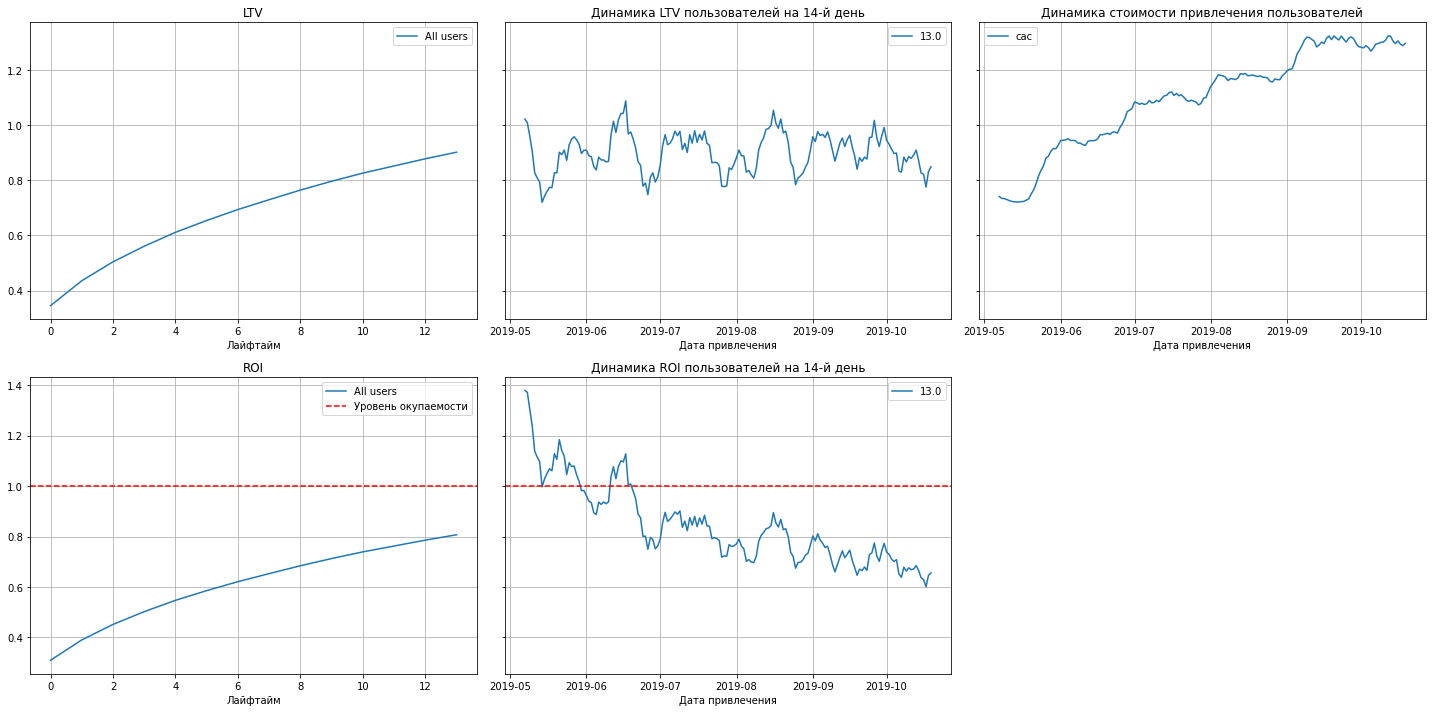

In [45]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать такие выводы:

* Реклама не окупается. ROI только по истечении двух недель приближается к 80%;
* Несмотря на то, что показатель LTV растет достаточными темпами, уровень его очень низок, и не превышает одного доллара на активного пользователя;
* Стоимость привлечения клиента постоянно растет. Исходя из оцентки сумарных расходов на рекламу в разрезе рекламных источников, мы выяснили, что расходы на `tiptop` и `faceboom` постоянно растут . 
* На LTV влияет сезонный фактор, но этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
* А вот динамика окупаемости показывает все тот же стабильный спад и реклама становится убыточной уже с июня-июля;
* Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

**5.2.** Начнём с разбивки по источникам привлечения: передадим параметру dimensions столбец `channel`.

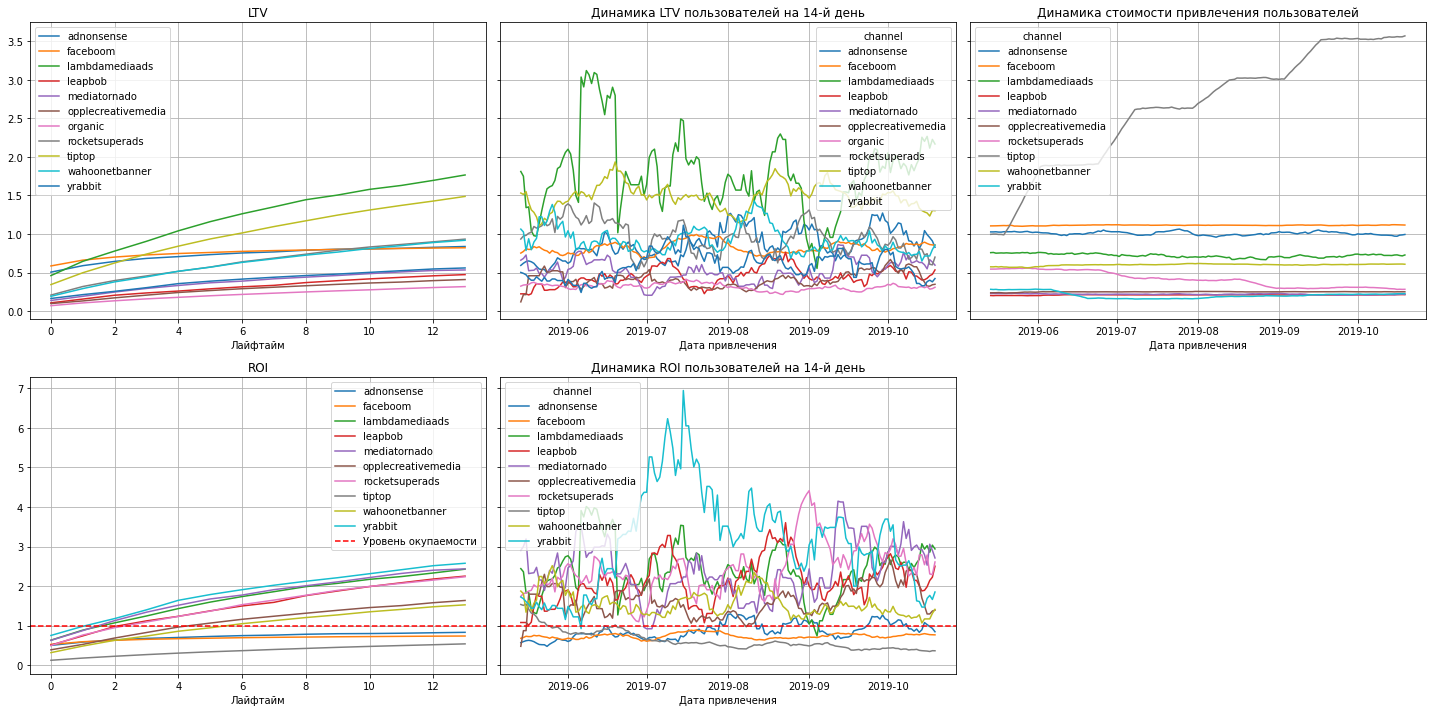

In [46]:
# смотрим окупаемость с разбивкой по источникам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

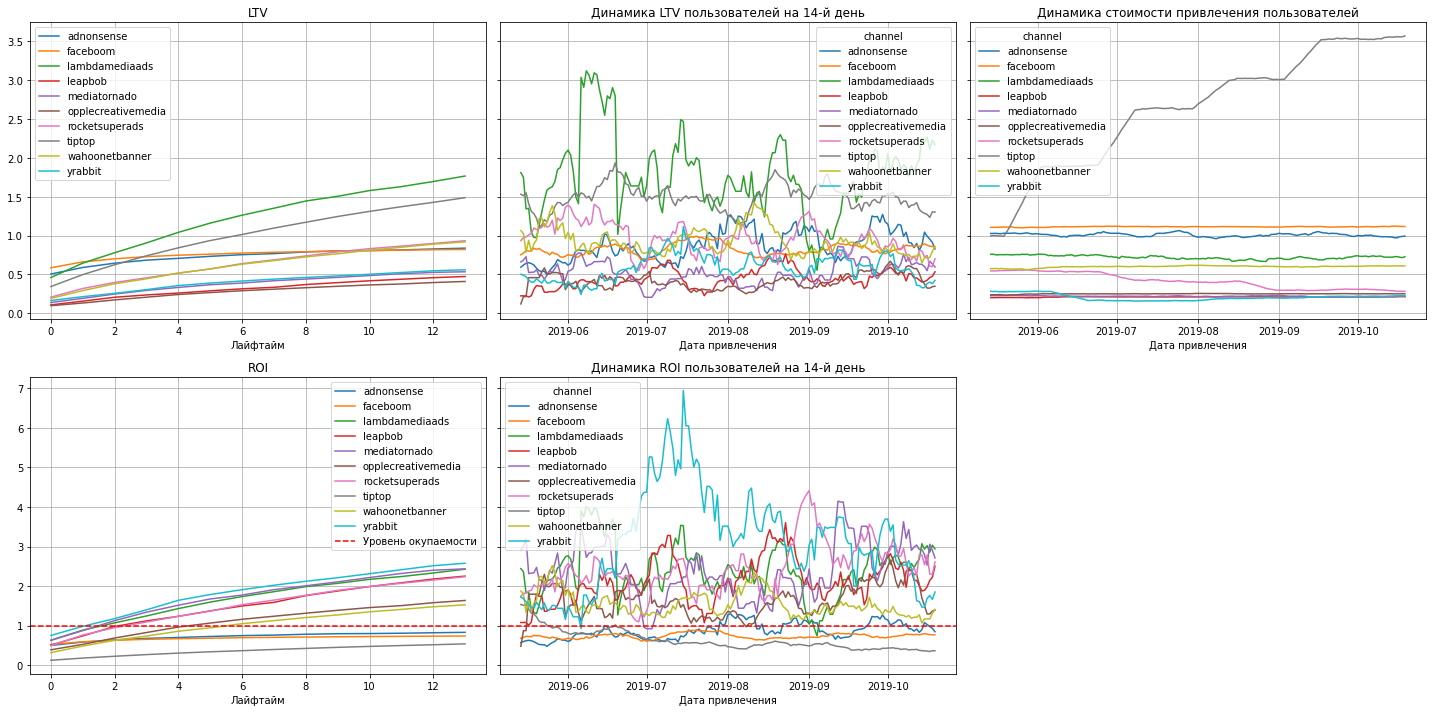

In [47]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Вот что говорят графики c разбивкой по источникам:

* Реклама окупается у большиства источников. В аутсайдерах - `tiptop`, `faceboom`, `adnonsense` - рекламные источники с самыми большими тратами на рекламу;
* Стоимость привлечения для `tiptop` стабильно растет большими темпами. Для `faceboom`, `adnonsense` стоимость выше аналогичного показателя  остальных источников, но стабильна.
* LTV всё так же подвержен сезонности, но стабилен. Для источника `yrabbit` в июле наблюдается сильный рост показателя, затем снижение к среднему уровню.
* Лучше всего окупается `yrabbit`.

**5.3.** Теперь проверим показатели окупаемости с разбивкой по странам (`region`).

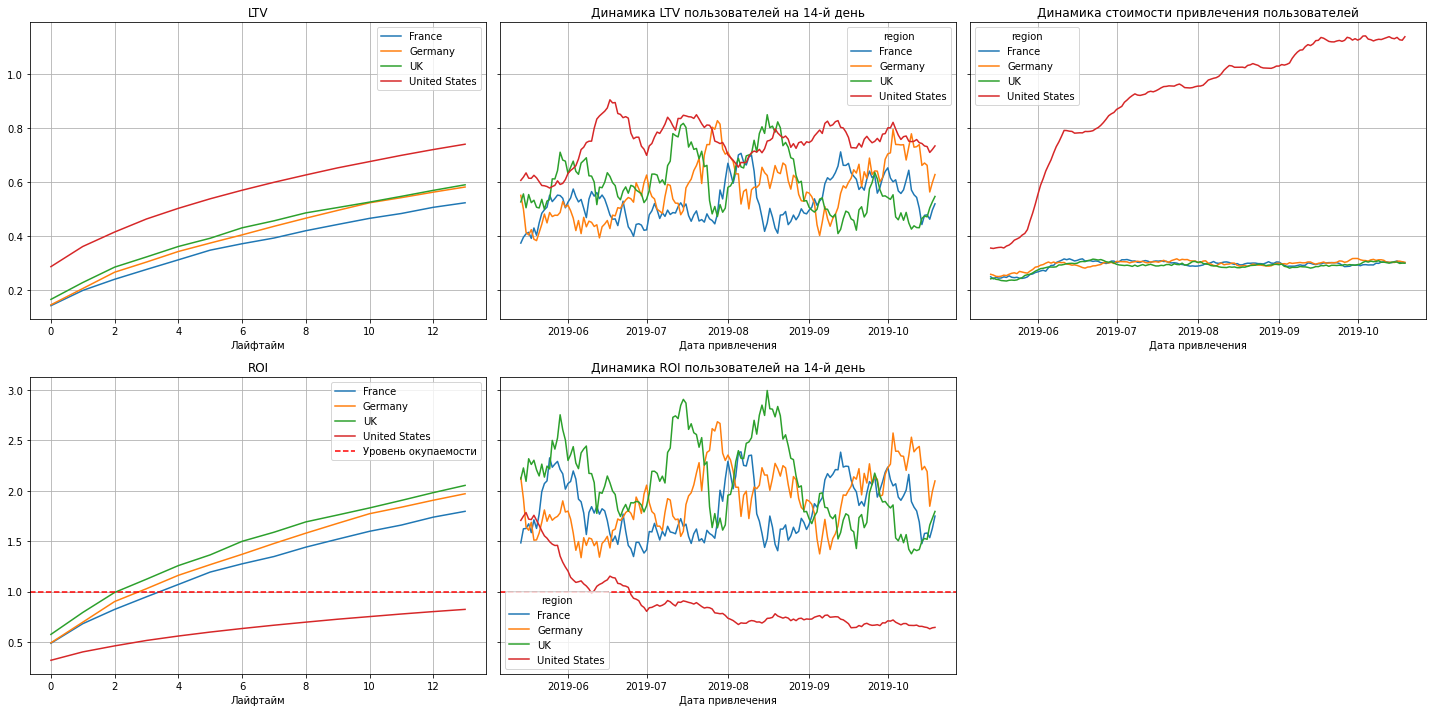

In [48]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

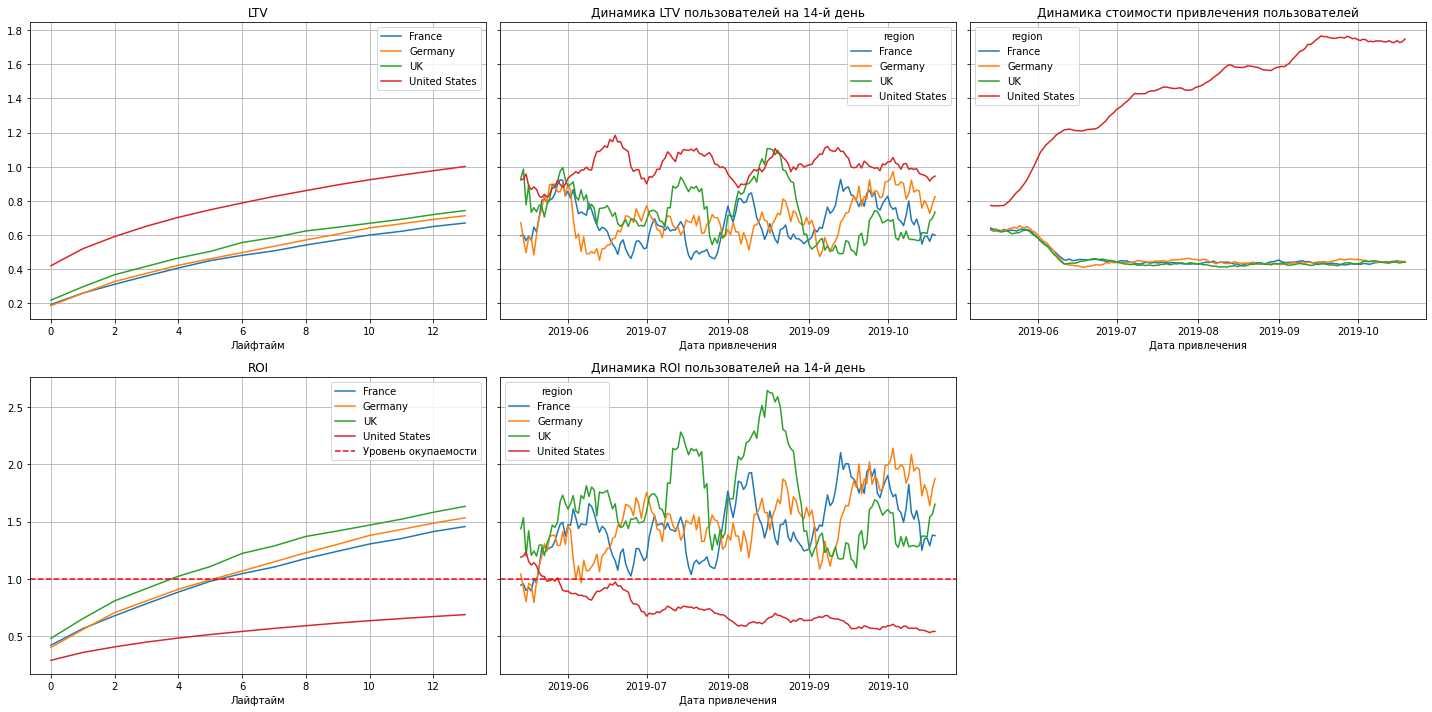

In [49]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Анализ показателей окупаемости с разбивкой по странам показал следующую картину:

* На гафиках заметно выделяется США, реклама не окупается на протяжении всего лайфтайма, и рассмотрев динамику показателя окупаемости по датам, можно увидеть переломный момент июнь-июль, где реклама стала приносить убытки;
* Произошло резкое увеличение стоимости привлечения начиная с июня, и дальнейший стабильный рост;
* В остальных странах реклама окупается уже на 3 день.
* Динамика показателей окупаемости и ценностии клиентов во Франции, Германии и Великобритании достаточно стабильна.

В связи с аналогичной динамикой роста стоимости привлечения клиентов для источника `tiptop` и страны `United States`, можно предположить, что целевая аудитория источника - жители США. 

Теперь проверим показатели окупаемости с разбивкой по устройствам.

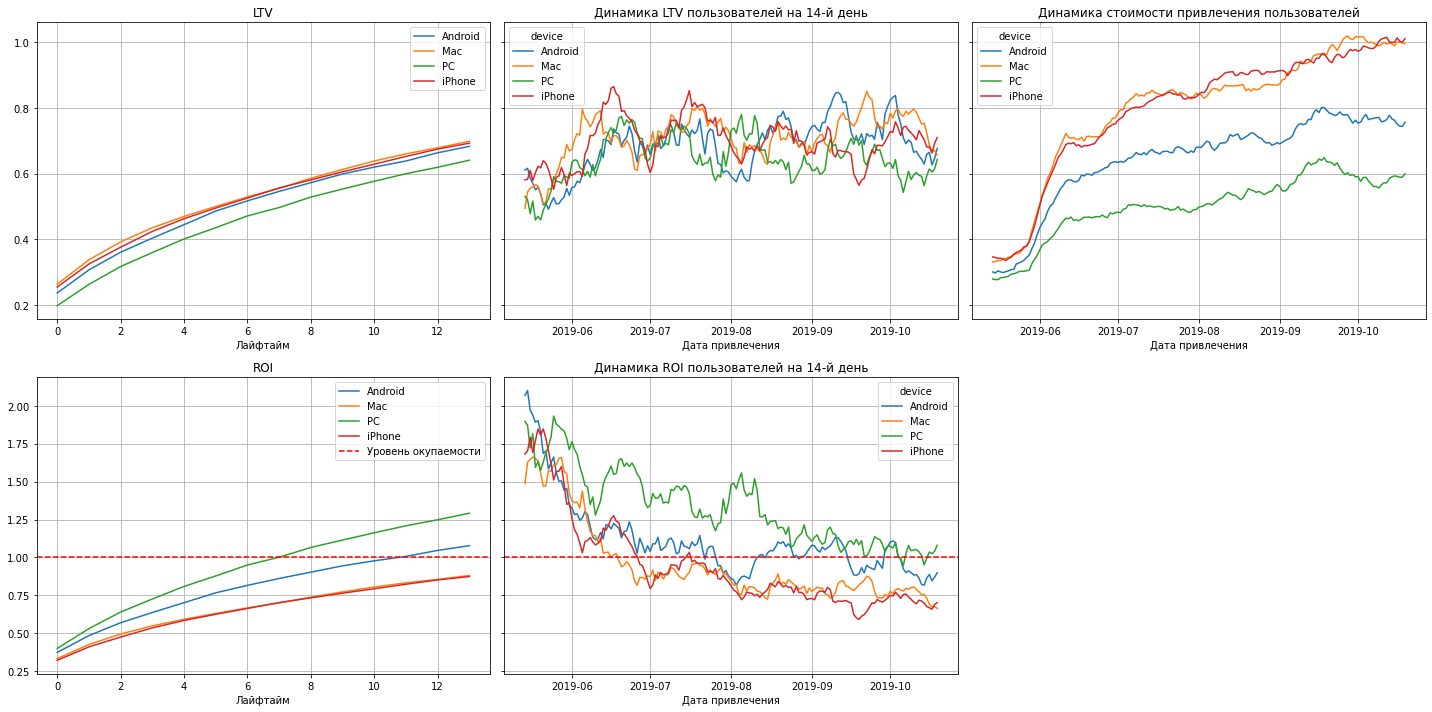

In [50]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

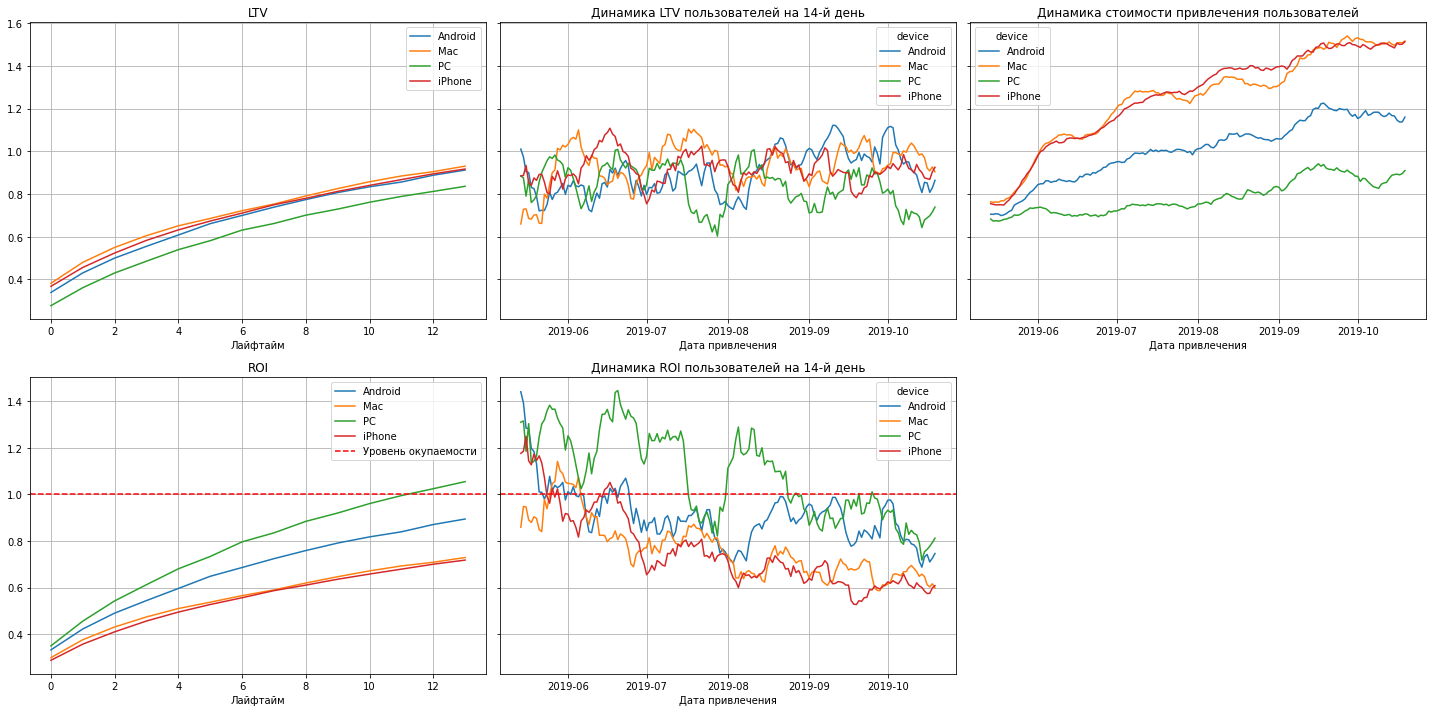

In [51]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

* Пользователи ``Mac``, ``iPhone`` и ``Android`` так и не окупились, к 14 дню показатель приближался к 70-80%.
* Стоимость привлечения пользователей стабильно растет для всех владельцев устройств, особенно для ``Mac`` и ``iPhone``. 
* Окупаемость падает для всех устройств и с июня - июля для владельцев ``Mac``, ``iPhone`` и `Android` выходит на убыточность.
* Явных аутсайдеров среди устройств нет, значит можно предположить, что дело не в технической неисправности.
    
**5.4.** Построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.


Конверсия пользователей по ['channel']


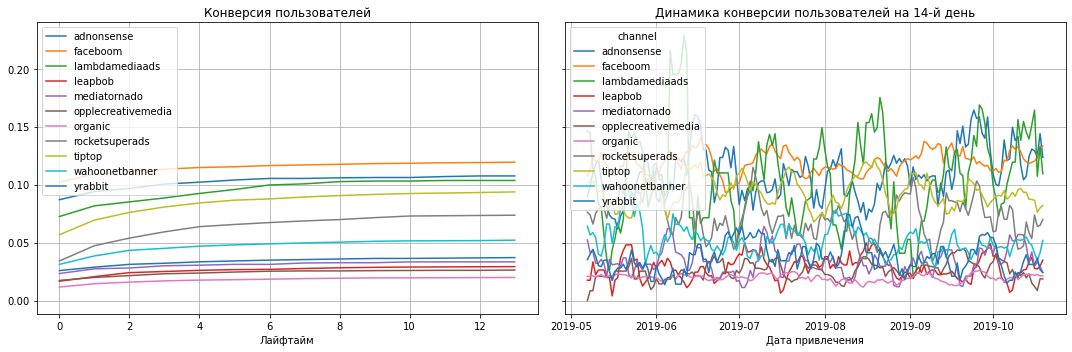


Конверсия пользователей по ['device']


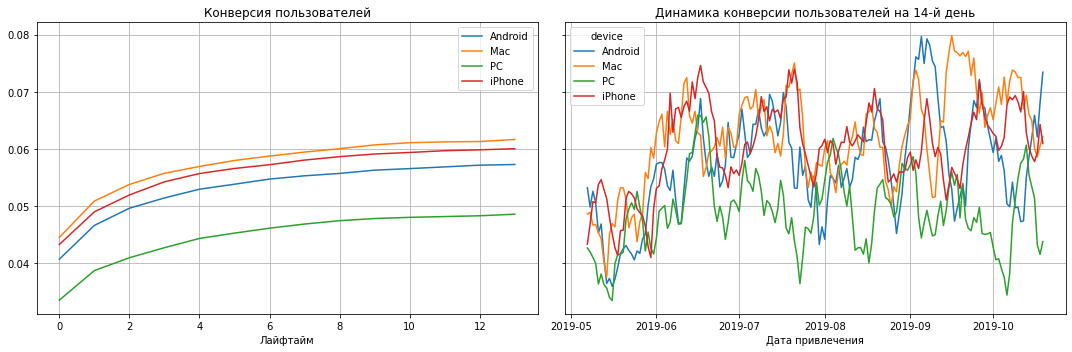


Конверсия пользователей по ['region']


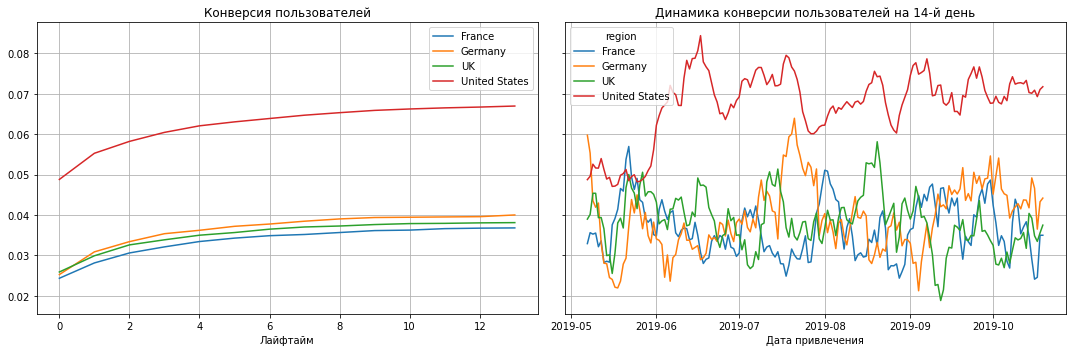

In [52]:
for i in (['channel'],['device'],['region']):
    print()
    print(f'Конверсия пользователей по {i}')
    conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=i
    )
    
    plot_conversion(conversion_grouped, conversion_history, horizon_days)


Удержание пользователей по ['channel']


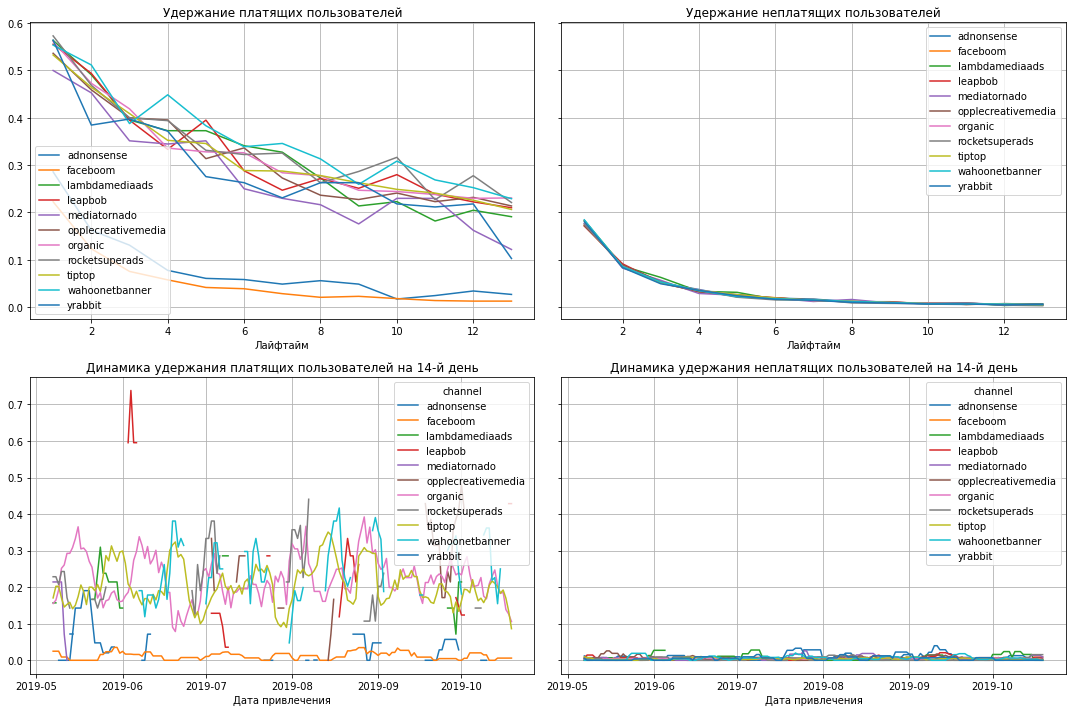


Удержание пользователей по ['device']


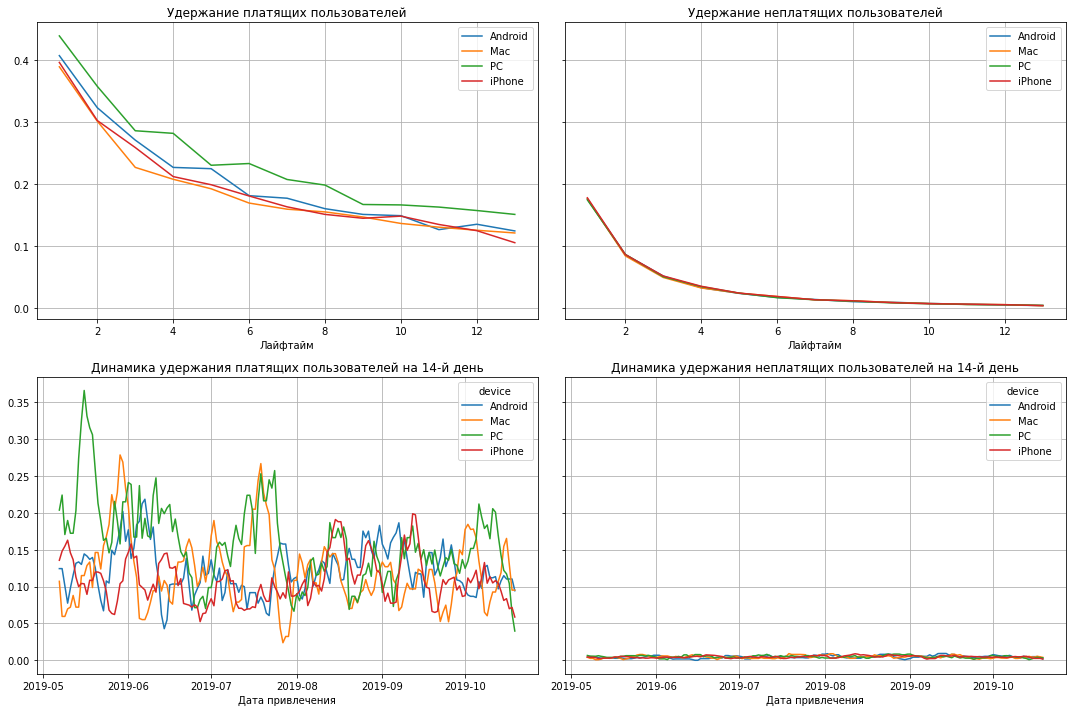


Удержание пользователей по ['region']


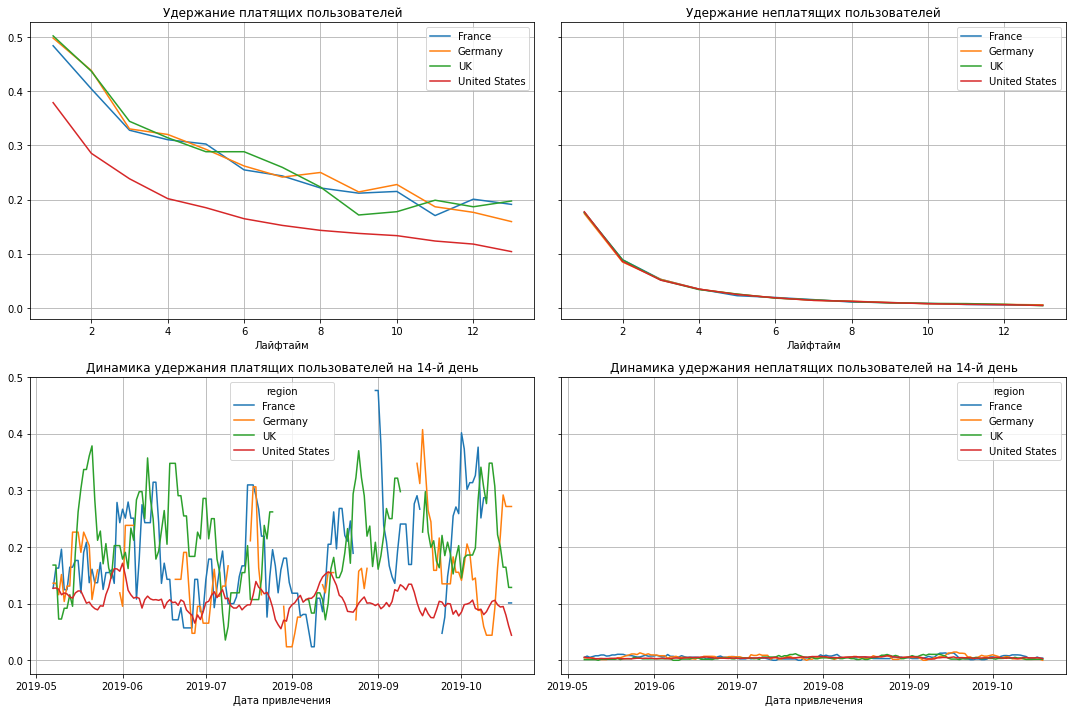

In [53]:
for x in (['channel'],['device'],['region']):
    print()
    print(f'Удержание пользователей по {x}')
    retention_raw, retention_grouped, retention_history = get_retention(

        profiles, visits, observation_date, horizon_days, dimensions=x
    )
    plot_retention(retention_grouped, retention_history, horizon_days)

Сдалаем выводы из полученных графиков:

* Лучше всего конвертируются в покупателей клиенты из источников `faceboom`, `adnonsense` и `lambdamediaads`, в среднем 10% пользователей этих источников стали покупателями;
* Для источника `tiptop` конверсия имеет среднее значение, чуть выше 7 %;
* Динамика конверсии пользователей не имеет выраженного восходящего или низходящего тренда, и довольно стабиль на протяжении всего периода исследования;
* Жители США конвертируются в покупателей гораздо чаще, около 7 % становятся покупателями. Конверсия же покупателей в других странах варьируется от 3 до 4 %;
* Удержание пользователей из источников `adnonsense` и `faceboom` имеет очень низкую величину, и уже к концу лайфтайма приближается к 0. Пользователи из этих источников не задерживаются;
* Рассмотрев метрики по другим критериям, никаких выделяющихся из общей массы значений мы не увидели.

### Шаг 6.

### Общий вывод.

Анализ основных метрик бизнеса показал следующие результаты:

* несмотря на большое число платящих пользователей пришедших из нескольких рекламных источников, таких как `faceboom` и `tiptop` (одни из самых конвертируемых пользователей), расходы на эту рекламу не окупаются за счет роста расходов;
* `tiptop` - самый убыточный источник, его окупаемость немногим превышает 50 %, для `faceboom` и `adnonsense` окупаемость составляет около 80% по истечении двух недель;
* Удержание пользователей пришедших из `faceboom` и `tiptop` тоже оставляет желать лучшего. К 14 дню жизни клиента практически все из пришедших уходят;
* Наибольшая стоимость рекламы из каналов привлечения клиентов `tiptop` и `faceboom`, доля расходов из этих источников к общей сумме расходов составляет 52 и 31 % соотвветственно. Расходы на рекламу из `tiptop` с мая по октябрь выросли примерно в 5 раз, на рекламу из `faceboom` в 2 раза, и несмотря на рост доходов от клиентов этих источников, и большой процент конвертации в покупателя, покупатели не задерживались и реклама в целом оказалась убыточной.

Следовательно, можно предположить, что убыток образовался из-за вложений в рекламу для нецелевой аудитории. Рекомендации по дальнейшему недопущению убытков - изучить целевую аудиторию, настроить таргетированную рекламу, либо изменить порядок расчетов за рекламную кампанию, чтобы не платить за нецелевого пользователя.

Каналы `Yrabbit` и `RocketSuperAds` подойдут в качестве потенциала для роста, при невысоких затратах на рекламу, одни из лучших каналов по окупаемости, с достаточно высокой конвертацией в платящие пользователи. Можно учесть сезонность - при постоянных расходах на рекламу по данным источникам, пик продаж среди пользователей пришедших из канала `Yrabbit` пришелся на летние месяцы, а для канала `RocketSuperAds` - на осенние.